# DeepRockSR
source https://www.digitalrocksportal.org/projects/215

## Data Description 

A Diverse Super Resolution Dataset of Digital Rocks (DeepRockSR): Sandstone, Carbonate, and Coal.

This dataset contains an organised and processed collection of greyscale digital rock images for the purpose of image super resolution training. In total, there are 12,000 2D images and 3,000 3D volumes contained in this dataset.

Sandstone:

Bentheimer Sandstone 1 https://www.digitalrocksportal.org/projects/211
Bentheimer Sandstone 2 https://www.digitalrocksportal.org/projects/135
Berea Sandstone https://www.digitalrocksportal.org/projects/135
Leopard Sandstone https://www.digitalrocksportal.org/projects/135
Gildehauser Sandstone https://www.digitalrocksportal.org/projects/134
Wilcox Tight Sandstone https://www.digitalrocksportal.org/projects/6

Carbonate:

Estaillades Carbonate https://www.digitalrocksportal.org/projects/58
Savonnieres Carbonate https://www.digitalrocksportal.org/projects/72
Massangis Carbonate https://www.digitalrocksportal.org/projects/73

Coal:

Sheared Coal https://www.digitalrocksportal.org/projects/21
Naturally Fractured Coal https://www.digitalrocksportal.org/projects/20


The dataset is organised in a similar fashion to the DIV2K dataset : (https://data.vision.ee.ethz.ch/cvl/DIV2K/). To the knowledge of the authors, this dataset is the first of its kind to be used for the purpose of benchmarking Super Resolution algorithms in digital rock images. This dataset has been used thus far to test several Super Resolution Convolutional Neural Networks (SRCNN). Results are described in the Related Publications tab on this page.

Please cite both this dataset (use its DOI) as well as the related journal publication.

### Data overview:

The dataset is divided into:

• 2D and 3D folders
• Sandstone, Carbonate, and Coal Datasets
• Combined shuffled Datasets
• High Resolution, 2x and 4x downsampled datasets using the Matlab imresize and imresize3 functions with default settings and randomised settings
• 2D HR images measure 500x500, cropped samples from the centre of the original cylindrical images, saved as PNG files
• 9600 2D images are available for training, 1200 for validation, and 1200 for testing.
• 3D HR volumes measure 100x100x100, cropped from the centre of the original cylindrical images, saved as octave and scipy readable MAT files (each array name is 'temp')
• 2400 3D volumes are available for training, 300 for validation, and 300 for testing.


In [3]:
%pylab inline
import pandas as pd
from tqdm.auto import tqdm
from pathlib import Path
import lasio
from pprint import pprint
import PIL
import shutil
from IPython.display import display

Populating the interactive namespace from numpy and matplotlib


In [4]:
datadir_in = Path("../../data/raw/deep-rock-sr/")
datadir_out = Path("../../data/processed/deep-rock-sr/")

In [5]:
import torchvision

In [40]:
sorted(datadir_in.glob("**/*train_*"))

[PosixPath('../../data/raw/deep-rock-sr/DeepRockSR-2D/carbonate2D/carbonate2D_train_HR'),
 PosixPath('../../data/raw/deep-rock-sr/DeepRockSR-2D/carbonate2D/carbonate2D_train_LR_default_X2'),
 PosixPath('../../data/raw/deep-rock-sr/DeepRockSR-2D/carbonate2D/carbonate2D_train_LR_default_X4'),
 PosixPath('../../data/raw/deep-rock-sr/DeepRockSR-2D/carbonate2D/carbonate2D_train_LR_unknown_X2'),
 PosixPath('../../data/raw/deep-rock-sr/DeepRockSR-2D/carbonate2D/carbonate2D_train_LR_unknown_X4'),
 PosixPath('../../data/raw/deep-rock-sr/DeepRockSR-2D/coal2D/coal2D_train_HR'),
 PosixPath('../../data/raw/deep-rock-sr/DeepRockSR-2D/coal2D/coal2D_train_LR_default_X2'),
 PosixPath('../../data/raw/deep-rock-sr/DeepRockSR-2D/coal2D/coal2D_train_LR_default_X4'),
 PosixPath('../../data/raw/deep-rock-sr/DeepRockSR-2D/coal2D/coal2D_train_LR_unknown_X2'),
 PosixPath('../../data/raw/deep-rock-sr/DeepRockSR-2D/coal2D/coal2D_train_LR_unknown_X4'),
 PosixPath('../../data/raw/deep-rock-sr/DeepRockSR-2D/sandston

In [52]:
# data_train = torchvision.datasets.ImageFolder(
#     '../../data/raw/deep-rock-sr/DeepRockSR-2D/',
#     is_valid_file=lambda f:('train_LR_default_X4' in f) and not ('shuffle' in f)
# )

# for i in np.random.choice(range(len(data_train)), 10):
#     x, y = data_train[i]
#     print(dict(i=i, y=y, classname=data_train.classes[y]))
#     display(x)

In [41]:
# copy small dataset to processed folder

In [50]:
for p in tqdm(sorted(datadir_in.glob("**/*LR_default_X4*"))):
    if "shuffle" not in p.name:
        print(p)
        shutil.copytree(p, str(p).replace("raw", "processed"))
        pass

# Load small 2d

Dataset ImageFolder
    Number of datapoints: 9600
    Root location: ../../data/processed/deep-rock-sr/DeepRockSR-2D/
['carbonate2D', 'coal2D', 'sandstone2D']
{'i': 1130, 'y': 0, 'classname': 'carbonate2D'}


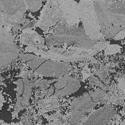

{'i': 5317, 'y': 1, 'classname': 'coal2D'}


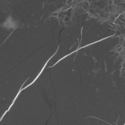

{'i': 6260, 'y': 1, 'classname': 'coal2D'}


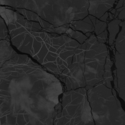

{'i': 3326, 'y': 1, 'classname': 'coal2D'}


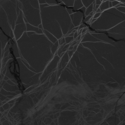

{'i': 8370, 'y': 2, 'classname': 'sandstone2D'}


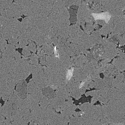

In [110]:
data_train = torchvision.datasets.ImageFolder(
    "../../data/processed/deep-rock-sr/DeepRockSR-2D/",
    is_valid_file=lambda f: ("train_LR_default_X4" in f) and not ("shuffle" in f),
)
print(data_train)
print(data_train.classes)
for i in np.random.choice(range(len(data_train)), 5):
    x, y = data_train[i]
    print(dict(i=i, y=y, classname=data_train.classes[y]))
    display(x)

# Load small 3d

Dataset ImageFolder
    Number of datapoints: 2400
    Root location: ../../data/processed/deep-rock-sr/DeepRockSR-3D/
['carbonate3D', 'coal3D', 'sandstone3D']
{'i': 1201, 'y': 1, 'classname': 'coal3D'}


/home/wassname/.pyenv/versions/jup3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:2: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  


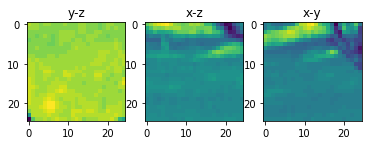

{'i': 494, 'y': 0, 'classname': 'carbonate3D'}


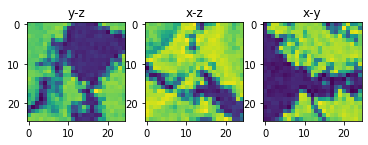

{'i': 1803, 'y': 2, 'classname': 'sandstone3D'}


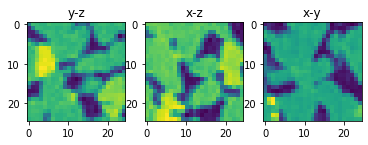

{'i': 2252, 'y': 2, 'classname': 'sandstone3D'}


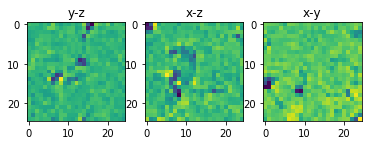

{'i': 1597, 'y': 1, 'classname': 'coal3D'}


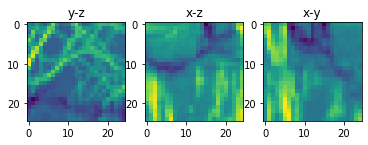

In [116]:
import h5py

load_mat = lambda f: np.array(h5py.File(f)["temp"])
data_train = torchvision.datasets.ImageFolder(
    "../../data/processed/deep-rock-sr/DeepRockSR-3D/",
    loader=load_mat,
    is_valid_file=lambda f: ("train_LR_default_X4" in f) and not ("shuffle" in f),
)
print(data_train)
print(data_train.classes)
for i in np.random.choice(range(len(data_train)), 5):
    x, y = data_train[i]
    print(dict(i=i, y=y, classname=data_train.classes[y]))
    plt.subplot(131)
    plt.title("y-z")
    plt.imshow(x[15, :, :])
    plt.subplot(132)
    plt.title("x-z")
    plt.imshow(x[:, 15])
    plt.subplot(133)
    plt.title("x-y")
    plt.imshow(x[:, :, 15])
    plt.show()